In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 気象データを管理するモジュール

## 1. Functions

### 1.1. 外気温度と水平面全天日射量

外気温度と水平面全天日射量を読み込む。

#### 入力値

location ：気象データの地点ID  

#### 出力値

$ H $ ：1月1日1時を1時間目（$H=1$）とする計算対象時間の年通算時間 (h)  
$ D $ ：1月1日を1日目（$D=1$）とする計算対象日の年通算日 (day)  
$ T_m $ ：標準時 (h)  
$ I_G $ ：水平面全天日射量 [MJ/(m<sup>2</sup>･h)]  
$ \theta_{ex}$ ：外気温 (℃)  

#### データの読込方法

拡張アメダス気象データから出力された時刻別の外気温及び水平面全天日射量の年間ファイル(2次元配列、CSV形式)を読み込み、再配列して1次元のリストとする。  
読込データの先頭行・先頭列・最終列は、不要なため削除する。

In [2]:
#気象データ読込と再配列
#年通算時間、年通算日、標準時、外気温、水平面全天日射量
def weather_input(L):
    
    w_tmp = np.genfromtxt('inputdata/' + L + '_tmp.CSV', skip_header = 1, delimiter = ',', dtype = float)
    w_ig  = np.genfromtxt('inputdata/' + L + '_ig.CSV', skip_header = 1, delimiter = ',', dtype = float)

    r_nhr  = np.zeros(8760)
    r_nday = np.zeros(8760)
    r_tm   = np.zeros(8760)
    r_tmp  = np.zeros(8760)
    r_ig   = np.zeros(8760)

    for i in range(0, 365):
        for j in range(0, 24):
            r_nhr[i * 24 + j]  = i * 24 + j + 1    #年通算時間[h]
            r_nday[i * 24 + j] = i + 1             #年通算日[day]
            r_tm[i * 24 + j]   = j + 1             #標準時[h]
            r_tmp[i * 24 + j]  = w_tmp[i, j + 1]   #外気温(℃)
            r_ig[i * 24 + j]   = w_ig[i, j + 1]    #全天日射量(MJ/(m2h))
    
    return r_nhr, r_nday, r_tm, r_tmp, r_ig

In [3]:
#気象データ読込と再配列
#年通算時間、年通算日、標準時、外気温、水平面全天日射量
class Weather():
    def __init__( self, L ):
        w_tmp = np.genfromtxt('inputdata/' + L + '_tmp.CSV', skip_header = 1, delimiter = ',', dtype = float)
        w_ig  = np.genfromtxt('inputdata/' + L + '_ig.CSV', skip_header = 1, delimiter = ',', dtype = float)
        
        self.nhr  = np.zeros(8760)
        self.nday = np.zeros(8760)
        self.tm   = np.zeros(8760)
        self.tmp  = np.zeros(8760)
        self.ig   = np.zeros(8760)
        
        for i in range(0, 365):
            for j in range(0, 24):
                self.nhr[i * 24 + j]  = i * 24 + j + 1    #年通算時間[h]
                self.nday[i * 24 + j] = i + 1             #年通算日[day]
                self.tm[i * 24 + j]   = j + 1             #標準時[h]
                self.tmp[i * 24 + j]  = w_tmp[i, j + 1]   #外気温(℃)
                self.ig[i * 24 + j]   = w_ig[i, j + 1]    #全天日射量(MJ/(m2h))

#### Example

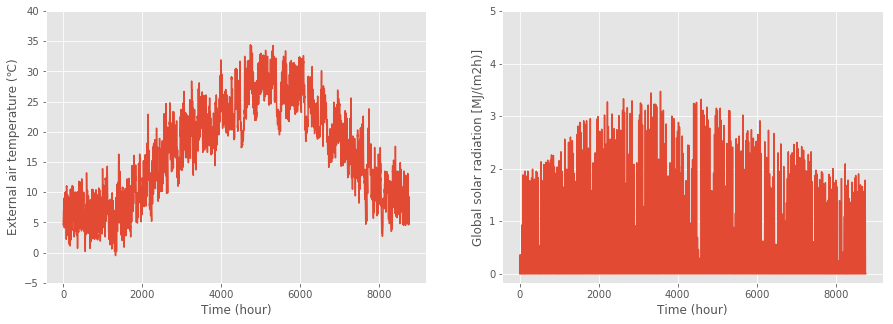

In [4]:
if __name__ == '__main__':

    location = '3639999'  #東京ID

    #気象データ読込
    w = Weather(location)
    # nhr = weather_input(location)[0]
    # nday = weather_input(location)[1]
    # tm = weather_input(location)[2]
    # tmp = weather_input(location)[3]
    # ig = weather_input(location)[4]

    #グラフの描画
    graph_num = 2
    ax = np.empty(graph_num, dtype = np.object)
    fig = plt.figure(figsize = (15, 5 * ((graph_num + 1) // 2)))
    plt.style.use('ggplot')

    gpc = 'C0'
    # gxd = nhr
    gxd = w.nhr
    # gyd = [tmp, ig]
    gyd = [ w.tmp, w.ig ]
    gxl = 'Time (hour)'
    gyl = ['External air temperature (℃)', 'Global solar radiation [MJ/(m2h)]']
    gyt = [[5 * (i - 1) for i in range(10)], [1 * i for i in range(6)]]

    for i in range(graph_num):   
        ax[i] = fig.add_subplot((graph_num + 1) // 2, 2, i + 1)
        ax[i].plot(gxd, gyd[i], color = gpc)
        ax[i].set_yticks(gyt[i])
        ax[i].set_xlabel(gxl, fontsize = 12)
        ax[i].set_ylabel(gyl[i], fontsize = 12)

    plt.show()

### 1.2. 計算結果確認用気象データ  

計算結果確認用に法線面直達日射量、水平面天空日射量、斜面直達日射量、斜面天空日射量、斜面地表面反射日射量、太陽高度角及び太陽方位角を読み込む。

#### 入力値  

location ：気象データの地点ID  

#### 出力値

$ I_{b,ea} $ ：法線面直達日射量 [MJ/(m<sup>2</sup>･h)]  
$ I_{d,ea} $ ：水平面天空日射量 [MJ/(m<sup>2</sup>･h)]  
$ I_{T,b,ea} $ ：斜面直達日射量 [MJ/(m<sup>2</sup>･h)]  
$ I_{T,d,ea} $ ：斜面天空日射量 [MJ/(m<sup>2</sup>･h)]  
$ I_{T,r,ea} $ ：斜面地表面反射日射量 [MJ/(m<sup>2</sup>･h)]  
$ h_{ea} $ ：太陽高度角 (°)  
$ A_{ea} $ ：太陽方位角 (°)  

#### データの読込方法

拡張アメダス気象データから出力された時刻別の法線面直達日射量、水平面天空日射量、斜面直達日射量、斜面天空日射量、斜面地表面反射日射量、太陽高度角及び太陽方位角の年間ファイル(2次元配列、CSV形式)を読み込み、再配列して1次元のリストとする。  
法線面直達日射量、水平面天空日射量、斜面直達日射量、斜面天空日射量及び斜面地表面反射日射量の読込データの先頭行・先頭列・最終列は、不要なため削除する。  
太陽高度角及び太陽方位角の読込データの先頭行・先頭列は、不要なため削除する。

In [5]:
#確認用気象データ読込と再配列
#法線面直達日射量、水平面天空日射量、斜面直達日射量、斜面天空日射量、斜面地表面反射日射量、太陽高度角、太陽方位角
def weather_confirm_input(L):
    
    w_ib = np.genfromtxt('inputdata/' + L + '_ib.CSV', skip_header = 1, delimiter = ',', dtype = float)
    w_id = np.genfromtxt('inputdata/' + L + '_id.CSV', skip_header = 1, delimiter = ',', dtype = float)
    w_itb = np.genfromtxt('inputdata/' + L + '_itb.CSV', skip_header = 1, delimiter = ',', dtype = float)
    w_itd = np.genfromtxt('inputdata/' + L + '_itd.CSV', skip_header = 1, delimiter = ',', dtype = float)
    w_itr = np.genfromtxt('inputdata/' + L + '_itr.CSV', skip_header = 1, delimiter = ',', dtype = float)
    w_h = np.genfromtxt('inputdata/' + L + '_h.CSV', skip_header = 1, delimiter = ',', dtype = float)
    w_A = np.genfromtxt('inputdata/' + L + '_A.CSV', skip_header = 1, delimiter = ',', dtype = float)
    
    r_ib = np.zeros(8760)
    r_id = np.zeros(8760)
    r_itb = np.zeros(8760)
    r_itd = np.zeros(8760)
    r_itr = np.zeros(8760)
    r_h = np.zeros(8760)
    r_A = np.zeros(8760)
    
    for i in range(0, 365):
        for j in range(0, 24):
            r_ib[i * 24 + j] = np.array(w_ib[i, j + 1])    #法線面直達日射量(MJ/(m2h))
            r_id[i * 24 + j] = np.array(w_id[i, j + 1])    #水平面天空日射量(MJ/(m2h))
            r_itb[i * 24 + j] = np.array(w_itb[i, j + 1])    #斜面直達日射量(MJ/(m2h))
            r_itd[i * 24 + j] = np.array(w_itd[i, j + 1])    #斜面天空日射量(MJ/(m2h))
            r_itr[i * 24 + j] = np.array(w_itr[i, j + 1])    #斜面地表面反射日射量(MJ/(m2h))
            r_h[i * 24 + j] = np.array(w_h[i, j + 1])    #太陽高度角(°)
            r_A[i * 24 + j] = np.array(w_A[i, j + 1])    #太陽方位角(°)
    
    return r_ib, r_id, r_itb, r_itd, r_itr, r_h, r_A

In [6]:
#確認用気象データ読込と再配列
#法線面直達日射量、水平面天空日射量、斜面直達日射量、斜面天空日射量、斜面地表面反射日射量、太陽高度角、太陽方位角
class WeatherConfirm():
    def __init__( self, L ):
        w_ib = np.genfromtxt('inputdata/' + L + '_ib.CSV', skip_header = 1, delimiter = ',', dtype = float)
        w_id = np.genfromtxt('inputdata/' + L + '_id.CSV', skip_header = 1, delimiter = ',', dtype = float)
        w_itb = np.genfromtxt('inputdata/' + L + '_itb.CSV', skip_header = 1, delimiter = ',', dtype = float)
        w_itd = np.genfromtxt('inputdata/' + L + '_itd.CSV', skip_header = 1, delimiter = ',', dtype = float)
        w_itr = np.genfromtxt('inputdata/' + L + '_itr.CSV', skip_header = 1, delimiter = ',', dtype = float)
        w_h = np.genfromtxt('inputdata/' + L + '_h.CSV', skip_header = 1, delimiter = ',', dtype = float)
        w_A = np.genfromtxt('inputdata/' + L + '_A.CSV', skip_header = 1, delimiter = ',', dtype = float)

        self.nhr = np.zeros(8760)
        self.ib  = np.zeros(8760)
        self.id  = np.zeros(8760)
        self.itb = np.zeros(8760)
        self.itd = np.zeros(8760)
        self.itr = np.zeros(8760)
        self.h   = np.zeros(8760)
        self.A   = np.zeros(8760)
        
        for i in range(0, 365):
            for j in range(0, 24):
                self.nhr[i * 24 + j]  = i * 24 + j + 1            #年通算時間[h]
                self.ib[i * 24 + j] = np.array(w_ib[i, j + 1])    #法線面直達日射量(MJ/(m2h))
                self.id[i * 24 + j] = np.array(w_id[i, j + 1])    #水平面天空日射量(MJ/(m2h))
                self.itb[i * 24 + j] = np.array(w_itb[i, j + 1])  #斜面直達日射量(MJ/(m2h))
                self.itd[i * 24 + j] = np.array(w_itd[i, j + 1])  #斜面天空日射量(MJ/(m2h))
                self.itr[i * 24 + j] = np.array(w_itr[i, j + 1])  #斜面地表面反射日射量(MJ/(m2h))
                self.h[i * 24 + j] = np.array(w_h[i, j + 1])      #太陽高度角(°)
                self.A[i * 24 + j] = np.array(w_A[i, j + 1])      #太陽方位角(°)

#### Example

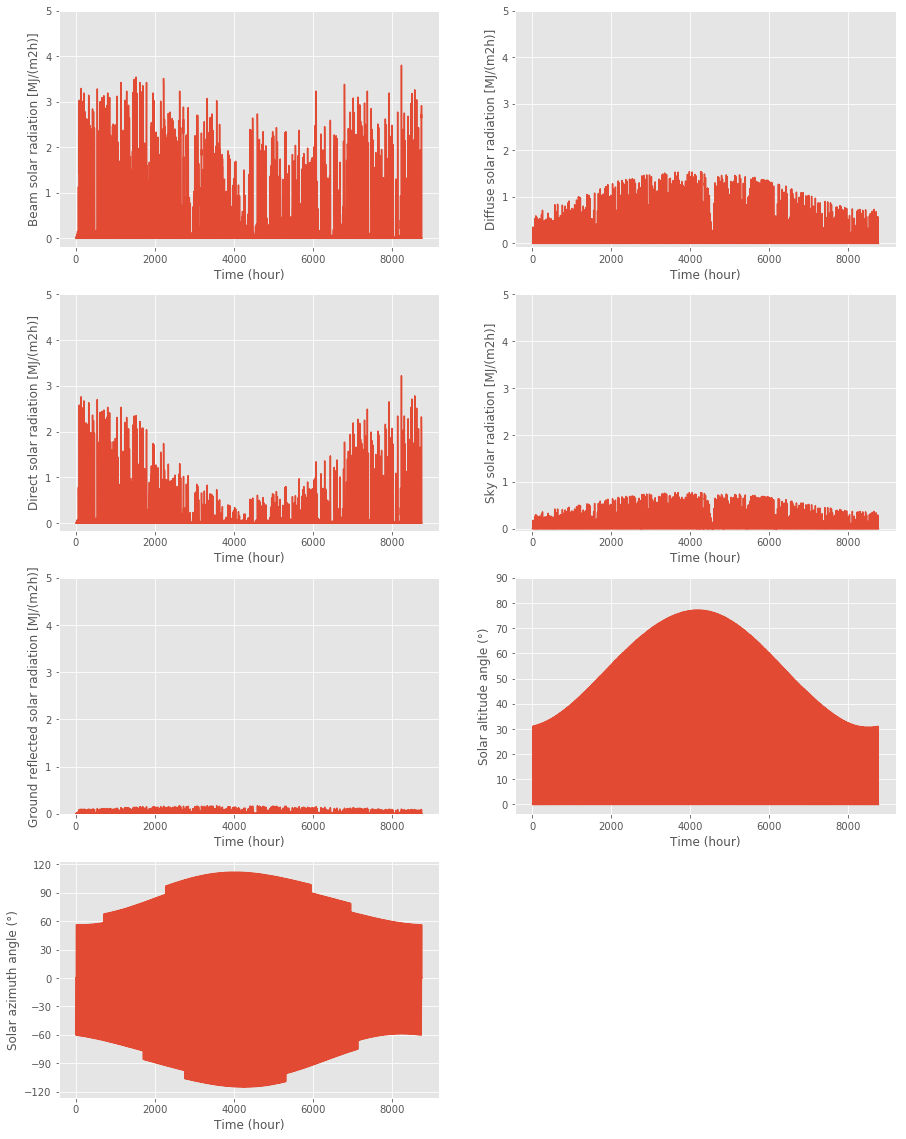

In [7]:
if __name__ == '__main__':

    location = '3639999'  #東京ID

    #確認用気象データ読込
    wc = WeatherConfirm(location)
    # nhr = weather_input(location)[0]
    # ib_ea = weather_confirm_input(location)[0]
    # id_ea = weather_confirm_input(location)[1]
    # itb_ea = weather_confirm_input(location)[2]
    # itd_ea = weather_confirm_input(location)[3]
    # itr_ea = weather_confirm_input(location)[4]
    # h_ea = weather_confirm_input(location)[5]
    # A_ea = weather_confirm_input(location)[6]

    #グラフの描画
    graph_num = 7
    ax = np.empty(graph_num, dtype = np.object)

    fig = plt.figure(figsize = (15, 5 * ((graph_num + 1) // 2)))
    plt.style.use('ggplot')

    gpc = 'C0'
    # gxd = nhr
    gxd = wc.nhr
    # gyd = [ib_ea, id_ea, itb_ea, itd_ea, itr_ea, h_ea, A_ea]
    gyd = [ wc.ib, wc.id, wc.itb, wc.itd, wc.itr, wc.h, wc.A ]
    gxl = 'Time (hour)'
    gyl = ['Beam solar radiation [MJ/(m2h)]', 'Diffuse solar radiation [MJ/(m2h)]', 'Direct solar radiation [MJ/(m2h)]', \
           'Sky solar radiation [MJ/(m2h)]', 'Ground reflected solar radiation [MJ/(m2h)]', 'Solar altitude angle (°)', \
           'Solar azimuth angle (°)']
    gyt = [[1 * i for i in range(6)], [1 * i for i in range(6)], [1 * i for i in range(6)], [1 * i for i in range(6)], \
           [1 * i for i in range(6)], [10 * i for i in range(10)], [30 * (i - 4) for i in range(9)]]

    for i in range(graph_num):   
        ax[i] = fig.add_subplot((graph_num + 1) // 2, 2, i + 1)
        ax[i].plot(gxd, gyd[i], color = gpc)
        ax[i].set_yticks(gyt[i])
        ax[i].set_xlabel(gxl, fontsize = 12)
        ax[i].set_ylabel(gyl[i], fontsize = 12)

    plt.show()